In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/User Behaviour/User_behavior_simulation.csv')
print(df.shape)
df.head()

(1000, 8)


,user_id,article_id,category,device,event_type,time_spent,timestamp,experiment_group
0,user_103,art_40,Teknologi,desktop,share_article,171,2025-04-09 12:54:33.303325,B
1,user_180,art_83,Teknologi,mobile,read_article,17,2025-04-15 12:54:33.303342,B
2,user_93,art_42,Politik,desktop,read_article,36,2025-04-11 12:54:33.303347,B
3,user_15,art_41,Hiburan,desktop,read_article,44,2025-03-31 12:54:33.303352,A
4,user_107,art_6,Hiburan,mobile,read_article,152,2025-03-31 12:54:33.303358,B


In [17]:
print(df.isna().sum())
print('\nduplikasi data:', df.duplicated().sum(), '\n')
df.info()

user_id             0
article_id          0
category            0
device              0
event_type          0
time_spent          0
timestamp           0
experiment_group    0
dtype: int64

duplikasi data: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           1000 non-null   object
 1   article_id        1000 non-null   object
 2   category          1000 non-null   object
 3   device            1000 non-null   object
 4   event_type        1000 non-null   object
 5   time_spent        1000 non-null   int64 
 6   timestamp         1000 non-null   object
 7   experiment_group  1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


**Rata-rata waktu baca per kategori**

In [21]:
avg_time_per_category = df.groupby('category')['time_spent'].mean()
print("Rata-rata waktu baca per kategori:")
print(avg_time_per_category)

Rata-rata waktu baca per kategori:
category
Ekonomi      157.176829
Hiburan      156.129630
Olahraga     158.144231
Politik      157.651042
Teknologi    154.763636
Name: time_spent, dtype: float64


<ipython-input-31-2a16920be85b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_per_category.index, y=avg_time_per_category.values, palette='viridis')


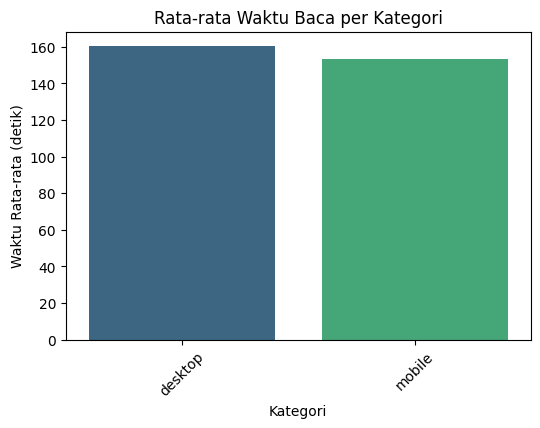

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x=avg_time_per_category.index, y=avg_time_per_category.values, palette='viridis')
plt.title("Rata-rata Waktu Baca per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Waktu Rata-rata (detik)")
plt.xticks(rotation=45)
plt.show()

**Rata-rata waktu baca per perangkat**

In [25]:
avg_time_per_device = df.groupby('device')['time_spent'].mean()
print("Rata-rata waktu baca per perangkat:")
print(avg_time_per_device)

Rata-rata waktu baca per perangkat:
device
desktop    160.295455
mobile     153.350775
Name: time_spent, dtype: float64


<ipython-input-33-d9a18ec61b39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_per_device.index, y=avg_time_per_device.values, palette='viridis')


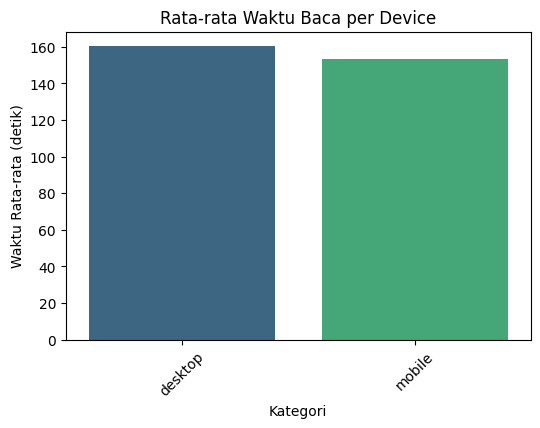

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x=avg_time_per_device.index, y=avg_time_per_device.values, palette='viridis')
plt.title("Rata-rata Waktu Baca per Device")
plt.xlabel("Kategori")
plt.ylabel("Waktu Rata-rata (detik)")
plt.xticks(rotation=45)
plt.show()

**Aktivitas Terbanyak**

In [26]:
activity_count = df['event_type'].value_counts()
print("Aktivitas terbanyak:")
print(activity_count)

Aktivitas terbanyak:
event_type
read_article      699
comment_submit    210
share_article      91
Name: count, dtype: int64


Chart


<ipython-input-42-6655ef647c97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='event_type', data=df, palette='Set2')


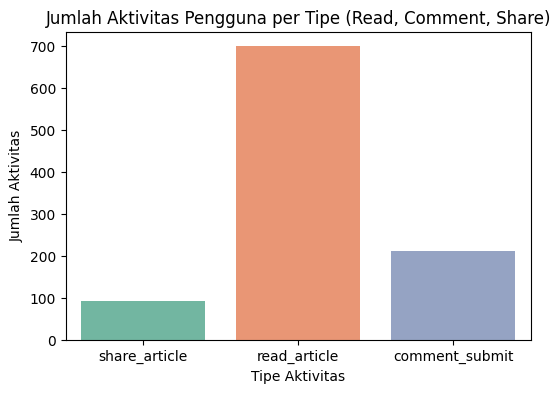



Barchart


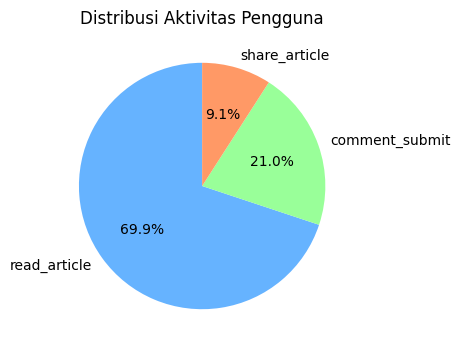

In [42]:
print('Chart')
plt.figure(figsize=(6,4))
sns.countplot(x='event_type', data=df, palette='Set2')
plt.title("Jumlah Aktivitas Pengguna per Tipe (Read, Comment, Share)")
plt.xlabel("Tipe Aktivitas")
plt.ylabel("Jumlah Aktivitas")
plt.show()

print('\n\nBarchart')

plt.figure(figsize=(6,4))
activity_count.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9966'], startangle=90)
plt.title("Distribusi Aktivitas Pengguna")
plt.ylabel('')
plt.show()

**Aktivitas per Kategori**

In [45]:
activity_per_category = df.groupby(['category', 'event_type']).size().unstack(fill_value=0)
print("Aktivitas per Kategori:")
print(activity_per_category)

Aktivitas per Kategori:
event_type  comment_submit  read_article  share_article
category                                               
Ekonomi                 38           112             14
Hiburan                 46           146             24
Olahraga                43           151             14
Politik                 40           127             25
Teknologi               43           163             14


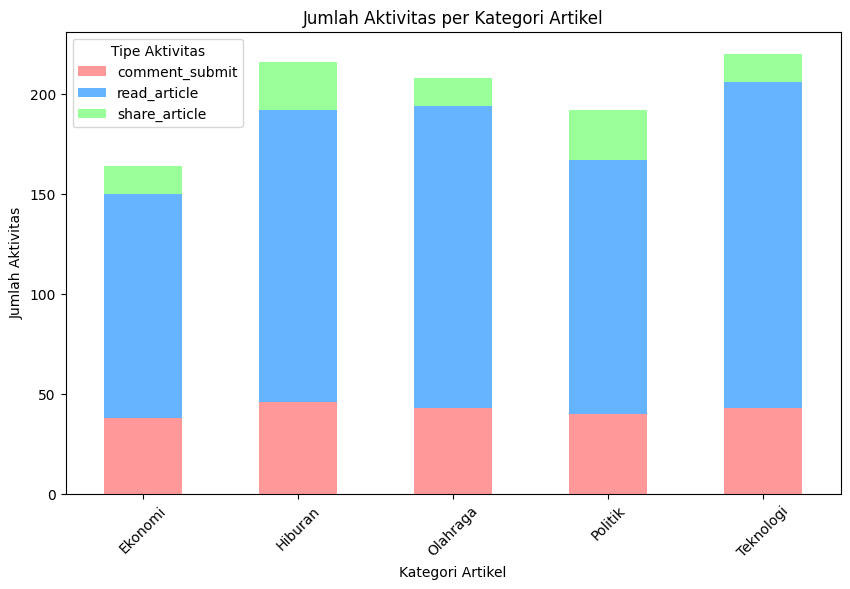

In [43]:
activity_per_category.plot(kind='bar', stacked=True, figsize=(10,6), color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Jumlah Aktivitas per Kategori Artikel")
plt.xlabel("Kategori Artikel")
plt.ylabel("Jumlah Aktivitas")
plt.xticks(rotation=45)
plt.legend(title='Tipe Aktivitas')
plt.show()

### **A/B Testing**

In [47]:
group_a = df[df['experiment_group'] == 'A']['time_spent']
group_b = df[df['experiment_group'] == 'B']['time_spent']


t_stat, p_value = stats.ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.4373918669163652
P-value: 0.15092012560504597


<ipython-input-48-bc7148fba9a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experiment_group', y='time_spent', data=df, palette='Set1')


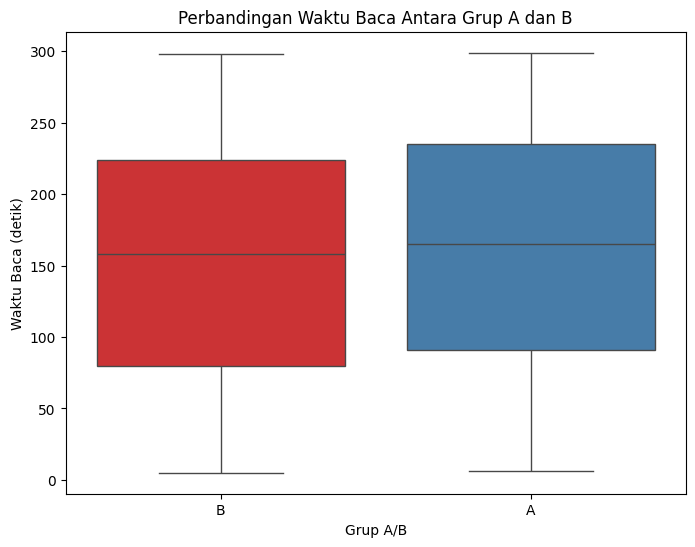

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x='experiment_group', y='time_spent', data=df, palette='Set1')
plt.title("Perbandingan Waktu Baca Antara Grup A dan B")
plt.xlabel("Grup A/B")
plt.ylabel("Waktu Baca (detik)")
plt.show()

**Analisis**:

Berdasarkan hasil yang diperoleh dari A/B testing berdasarkan waktu baca, didapati p-value sebesar 0.15092. Dikarenakan p-value > 0.05 maka bisa dikatakan bahwa tidak ada perbedaan signifikan antara kategori A dan B berdasarkan waktu baca.